# Milestone 1
Isabella Sturm

2021-04-25

In [22]:
# Load packages
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text import FreqDistVisualizer

In [85]:
# Load the data
wine_df = pd.read_csv('winemag-data.csv')

wine_subset = wine_df[['country', 'description', 'points','price', 'province', 'title', 'variety', 'winery']]

# Extract year from the Title
def getYear(x):
    year = re.search('(\d{4})', x)
    if year:
        return int(year.group())
    else:
        return None
wine_subset['year'] = wine_subset['title'].apply(lambda x: getYear(x))
wine_subset.head()

<ipython-input-85-b7399090f5fc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_subset['year'] = wine_subset['title'].apply(lambda x: getYear(x))


,country,description,points,price,province,title,variety,winery,year
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Sicily & Sardinia,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013.0
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011.0
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013.0
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013.0
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012.0


In [19]:
# Clean up wine reviews (descriptions) for analysis
wine_descriptions = wine_subset['description']

data = []
for desc in wine_descriptions:
    # Remove non-alphabetic characters and make all lowercase
    desc = re.sub('[^A-Za-z ]', '', desc)
    # Make all lowercase
    desc = desc.lower()
    
    # Tokenize the words
    tokenized_description = word_tokenize(desc)
    
    # Remove stop words and stems of words
    stemmer = PorterStemmer()
    processed_descriptions = []
    for word in tokenized_description:
        if word not in set(stopwords.words('english')):
            processed_descriptions.append(stemmer.stem(word))
            
    # Put the processed words back into connected string
    desc_text = " ".join(processed_descriptions)
    data.append(desc_text)
    
data

['aroma includ tropic fruit broom brimston dri herb palat isnt overli express offer unripen appl citru dri sage alongsid brisk acid',
 'ripe fruiti wine smooth still structur firm tannin fill juici red berri fruit freshen acid alreadi drinkabl although certainli better',
 'tart snappi flavor lime flesh rind domin green pineappl poke crisp acid underscor flavor wine stainlesssteel ferment',
 'pineappl rind lemon pith orang blossom start aroma palat bit opul note honeydrizzl guava mango give way slightli astring semidri finish',
 'much like regular bottl come across rather rough tannic rustic earthi herbal characterist nonetheless think pleasantli unfussi countri wine good companion hearti winter stew',
 'blackberri raspberri aroma show typic navarran whiff green herb case horseradish mouth fairli full bodi tomatoey acid spici herbal flavor complement dark plum fruit finish fresh grabbi',
 'here bright inform red open aroma candi berri white pepper savori herb carri palat balanc fresh ac

In [23]:
# Create feature matrix
features = CountVectorizer()
vectorized_descriptions = features.fit_transform(data)
vectorized_descriptions.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

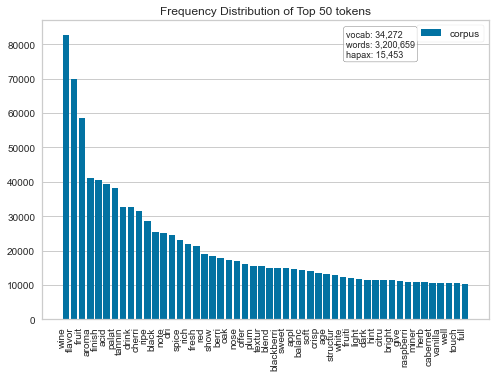

In [27]:
# Show to frequency of the top 50 words describing the wines
feature_words = features.get_feature_names()
visualizer = FreqDistVisualizer(features=feature_words, orient='v')
visualizer.fit(vectorized_descriptions)
visualizer.show()

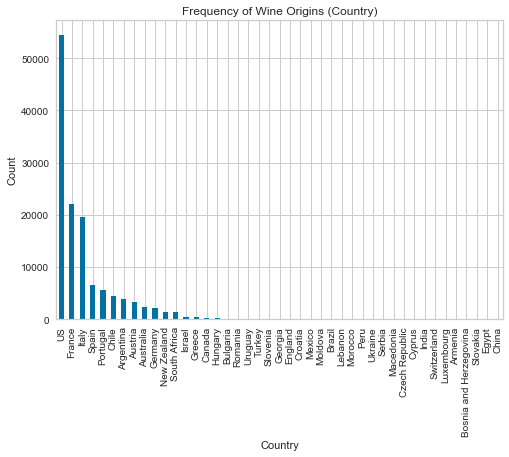

In [45]:
# Frequency of the countries wine comes from
plt.title("Frequency of Wine Origins (Country)")
plt.xlabel("Country")
plt.ylabel("Count")
wine_subset['country'].value_counts().plot(kind='bar')


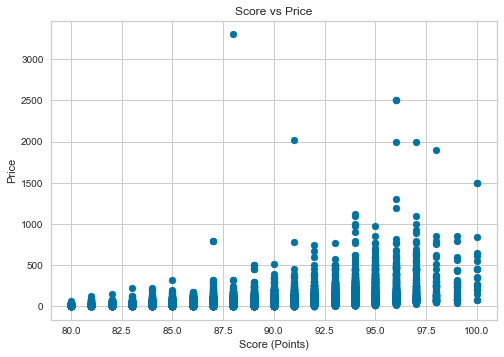

In [53]:
# Score compared to Price
fig,ax = plt.subplots()
ax.scatter(wine_subset['points'], wine_subset['price'])
plt.title("Score vs Price")
plt.xlabel("Score (Points)")
plt.ylabel("Price")
plt.show()

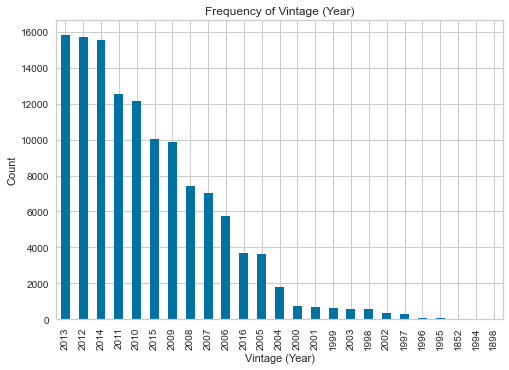

In [68]:
# Frequency of vintage (year)
plt.title("Frequency of Vintage (Year)")
plt.xlabel("Vintage (Year)")
plt.ylabel("Count")
wine_subset['year'].value_counts()[:25].plot(kind='bar')

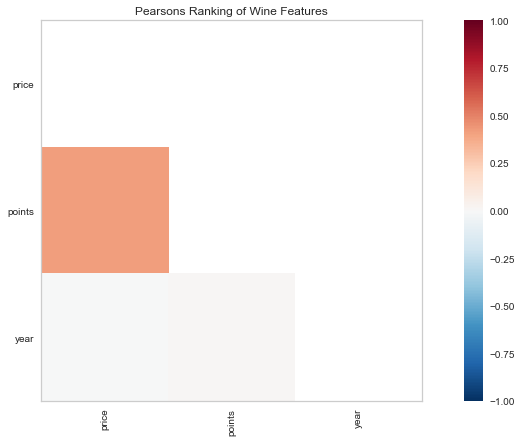

In [87]:
from yellowbrick.features import Rank2D
features = ['price', 'points', 'year']
x = wine_subset[features].dropna().values

# Use Pearsons ranking to view correlation between features
plt.rcParams['figure.figsize'] = (15,7)
visualizer = Rank2D(features=features, algorithm='pearson')
visualizer.fit(x)
visualizer.transform(x)
plt.title('Pearsons Ranking of Wine Features')
plt.show()